4. Tome un ejemplo de uso de una librería Python de AGs y desarróllela completamente.
Nota. Pueden utilizar todas las herramientas de IA Generativa que considere para la solución de los ejercicios y problemas anteriores. Por ejemplo, pedir a Chat-Gpt que le dé el algoritmo o los operadores.


El problema de la mochila consiste en seleccionar un conjunto de objetos de un conjunto dado, donde cada objeto tiene un valor y un peso asociado. El objetivo es maximizar el valor total de los objetos seleccionados sin exceder la capacidad total de peso de la mochila.

In [1]:
import random
from deap import base, creator, tools

In [2]:
# Definir el tamaño máximo de la mochila y los objetos disponibles
peso_maximo = 50
objetos = [(10, 5), (13, 7), (17, 11), (8, 4), (6, 3), (9, 6)]

# Definir la función de aptitud (fitness)
def evaluar(individual):
    peso_total = 0
    valor_total = 0
    for i in range(len(individual)):
        if individual[i] == 1:
            peso_total += objetos[i][0]
            valor_total += objetos[i][1]
    if peso_total > peso_maximo:
        return 0,  # Devolver una tupla para ser compatible con DEAP
    return valor_total,

# Definir los componentes básicos de DEAP
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=len(objetos))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evaluar)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# Configurar los parámetros de la evolución
num_generaciones = 50
tamano_poblacion = 100
probabilidad_cruce = 0.8
probabilidad_mutacion = 0.2

# Crear la población inicial
poblacion = toolbox.population(n=tamano_poblacion)

# Ejecutar el algoritmo genético
for gen in range(num_generaciones):
    # Seleccionar la siguiente generación de individuos
    offspring = toolbox.select(poblacion, len(poblacion))
    offspring = list(map(toolbox.clone, offspring))

    # Aplicar operadores genéticos a la descendencia
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < probabilidad_cruce:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values

    for mutant in offspring:
        if random.random() < probabilidad_mutacion:
            toolbox.mutate(mutant)
            del mutant.fitness.values

    # Evaluar los individuos con aptitud invalidada
    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    # Reemplazar la población anterior con la descendencia
    poblacion[:] = offspring

# Obtener el mejor individuo de la última generación
mejor_individuo = tools.selBest(poblacion, 1)[0]

# Imprimir la solución encontrada
print("Mejor solución encontrada:")
for i in range(len(mejor_individuo)):
    if mejor_individuo[i] == 1:
        print(f"Objeto {i+1}: peso={objetos[i][0]}, valor={objetos[i][1]}")

Mejor solución encontrada:
Objeto 1: peso=10, valor=5
Objeto 2: peso=13, valor=7
Objeto 3: peso=17, valor=11
Objeto 6: peso=9, valor=6


Este código implementa un algoritmo genético utilizando la librería DEAP para resolver el problema de la mochila. Se definen los componentes básicos de DEAP, como la función de aptitud, los operadores genéticos y los parámetros de evolución. Luego, se ejecuta el algoritmo genético durante un número determinado de generaciones y se obtiene el mejor individuo de la última generación, que representa la mejor solución encontrada.

c:\Python310\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Python310\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


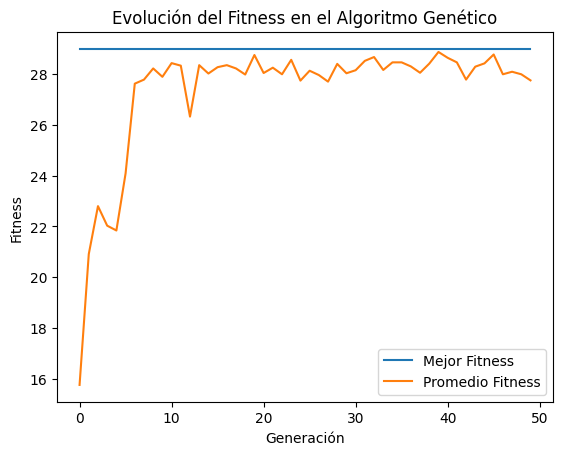

In [3]:
import random
import matplotlib.pyplot as plt
from deap import base, creator, tools

# Definir el tamaño máximo de la mochila y los objetos disponibles
peso_maximo = 50
objetos = [(10, 5), (13, 7), (17, 11), (8, 4), (6, 3), (9, 6)]

# Definir la función de aptitud (fitness)
def evaluar(individual):
    peso_total = 0
    valor_total = 0
    for i in range(len(individual)):
        if individual[i] == 1:
            peso_total += objetos[i][0]
            valor_total += objetos[i][1]
    if peso_total > peso_maximo:
        return 0,  # Devolver una tupla para ser compatible con DEAP
    return valor_total,

# Definir los componentes básicos de DEAP
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=len(objetos))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evaluar)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# Configurar los parámetros de la evolución
num_generaciones = 50
tamano_poblacion = 100
probabilidad_cruce = 0.8
probabilidad_mutacion = 0.2

# Crear la población inicial
poblacion = toolbox.population(n=tamano_poblacion)

# Listas para almacenar el mejor fitness y promedio fitness de cada generación
mejor_fitness = []
promedio_fitness = []

# Ejecutar el algoritmo genético
for gen in range(num_generaciones):
    # Seleccionar la siguiente generación de individuos
    offspring = toolbox.select(poblacion, len(poblacion))
    offspring = list(map(toolbox.clone, offspring))

    # Aplicar operadores genéticos a la descendencia
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < probabilidad_cruce:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values

    for mutant in offspring:
        if random.random() < probabilidad_mutacion:
            toolbox.mutate(mutant)
            del mutant.fitness.values

    # Evaluar los individuos con aptitud invalidada
    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    # Reemplazar la población anterior con la descendencia
    poblacion[:] = offspring

    # Obtener el mejor individuo de la generación actual
    mejor_individuo = tools.selBest(poblacion, 1)[0]

    # Guardar el mejor fitness y promedio fitness de la generación actual
    mejor_fitness.append(mejor_individuo.fitness.values[0])
    promedio_fitness.append(sum([ind.fitness.values[0] for ind in poblacion]) / len(poblacion))

# Generar el gráfico de evolución del fitness
generaciones = range(num_generaciones)
plt.plot(generaciones, mejor_fitness, label="Mejor Fitness")
plt.plot(generaciones, promedio_fitness, label="Promedio Fitness")
plt.xlabel("Generación")
plt.ylabel("Fitness")
plt.title("Evolución del Fitness en el Algoritmo Genético")
plt.legend()
plt.show()

## Conclusión

En resumen, el código presentado implementa un algoritmo genético para resolver el problema de la mochila. El objetivo es encontrar la combinación óptima de objetos disponibles para maximizar el valor total dentro del límite de peso máximo de la mochila.

El algoritmo utiliza la biblioteca DEAP (Distributed Evolutionary Algorithms in Python) para definir los componentes básicos de un algoritmo genético, como la creación de la población inicial, la definición de la función de aptitud, la selección, el cruce y la mutación de individuos. Se ejecuta durante un número específico de generaciones, aplicando los operadores genéticos a la población para evolucionar hacia soluciones mejores.

El código también muestra la visualización de la evolución del fitness a lo largo de las generaciones mediante un gráfico. Esto permite observar cómo el fitness del mejor individuo y el promedio del fitness de la población cambian a medida que avanza el algoritmo genético.

En conclusión, este código ilustra cómo se puede utilizar un algoritmo genético para resolver problemas de optimización, como el de la mochila. Proporciona una estructura modular y flexible para definir y evolucionar soluciones mediante la selección natural inspirada en la evolución biológica.